# Tugas

* Pakailah data dari https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset.  

* Preprocess data, gunakan lemmatization dan DTM-idf sebagai bagian dari Preprocessing.  

* Tampilkan words frequency, wordcloud dan sentences length dari span vs not spam.  

* Gunakan machine learning untuk memprediksi apakah suatu email merupakan email spam atau tidak.

Kirim notebook kalian ke brigita.gems@gmail.com dengan subject: Text Mining.

gunakan 500 data pertama ya merupakan non spm dan 100 data pertama yang merupakan spam.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
from string import punctuation
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('spam_or_not_spam.csv')
df.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [3]:
df_new = pd.DataFrame(columns=['email','label'])
df_new

,email,label


In [4]:
# Not-spam
not_spam = df.loc[df['label']==0][:500]
not_spam.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [5]:
# Spam
spam = df.loc[df['label']==1][:100]
spam.head(3)

,email,label
2500,save up to NUMBER on life insurance why spend...,1
2501,NUMBER fight the risk of cancer URL NUMBER sli...,1
2502,NUMBER fight the risk of cancer URL NUMBER sli...,1


In [6]:
df_new = df_new.append(not_spam, ignore_index=True)
df_new.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [7]:
df_new = df_new.append(spam, ignore_index=True)
df_new.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [8]:
df_new.shape

(600, 2)

In [9]:
df_new['label'].dtype

dtype('O')

# Preprocessing

## Prep 1-6

In [10]:
# 1. Converting lowercase
def to_lower(text):
    return text.lower()

In [11]:
# 2. Contraction
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [12]:
# 3. Remove number / convert number to text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [13]:
# 4. Remove Punctuation
def remove_punc(text):
    return ''.join(c for c in text if c not in punctuation)

In [14]:
# 5. Remove white space
def to_strip(text):
    return ' '.join(text.split())

In [15]:
# 6. Remove stopwords
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    stop_words.extend(['u','n','ur'])
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [16]:
# combine preprocessing method (1-6)
df_new['email_prep1'] = df_new['email'].apply(to_lower)
df_new['email_prep2'] = df_new['email_prep1'].apply(main_contraction)
df_new['email_prep3'] = df_new['email_prep2'].apply(remove_numbers)
df_new['email_prep4'] = df_new['email_prep3'].apply(remove_punc)
df_new['email_prep5'] = df_new['email_prep4'].apply(to_strip)
df_new['email_prep6'] = df_new['email_prep5'].apply(to_lower)

In [17]:
df_new.head()

,email,label,email_prep1,email_prep2,email_prep3,email_prep4,email_prep5,email_prep6
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numb...,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...,martin a posted tassos papadopoulos the greek ...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...,klez the virus that won t die already the most...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which ...,in adding cream to spaghetti carbonara which h...,in adding cream to spaghetti carbonara which h...


## Prep Lemmatization

In [18]:
# Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatize_word = [wordnet_lemmatizer.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_word)

In [19]:
# apply lemmatization ke email_prep6
df_new['email_prep_lemma'] = df_new['email_prep6'].apply(lemmatize)

In [20]:
df_new[['email_prep6','email_prep_lemma']].head(3)

,email_prep6,email_prep_lemma
0,date wed number aug number number number numbe...,date wed number aug number number number numbe...
1,martin a posted tassos papadopoulos the greek ...,martin a posted tasso papadopoulos the greek s...
2,man threatens explosion in moscow thursday aug...,man threatens explosion in moscow thursday aug...


# Text Exploration

### 1. Word Freq


In [21]:
# 1. Word Freq
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

kamus_unclean = kamus(df_new['email_prep_lemma'])

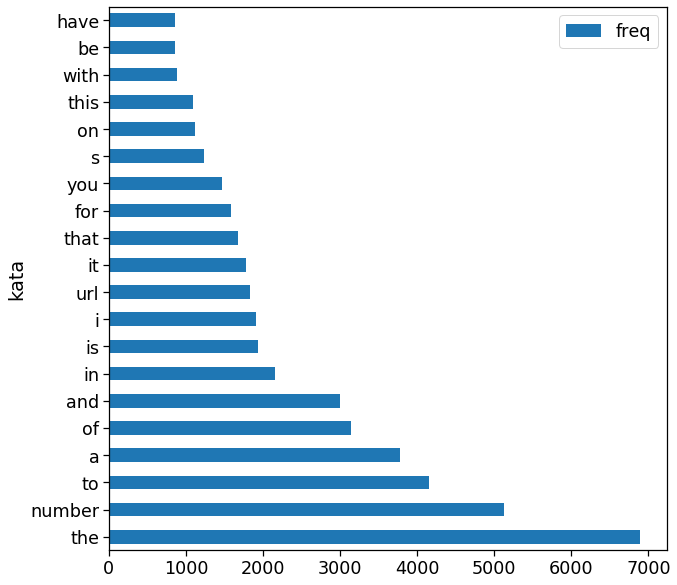

In [22]:
sns.set_context(context='notebook', font_scale=1.6)
kamus_unclean[:20].plot(kind='barh', figsize=(10,10))

### 2. Word Cloud


In [23]:
# 2. Word Cloud

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")



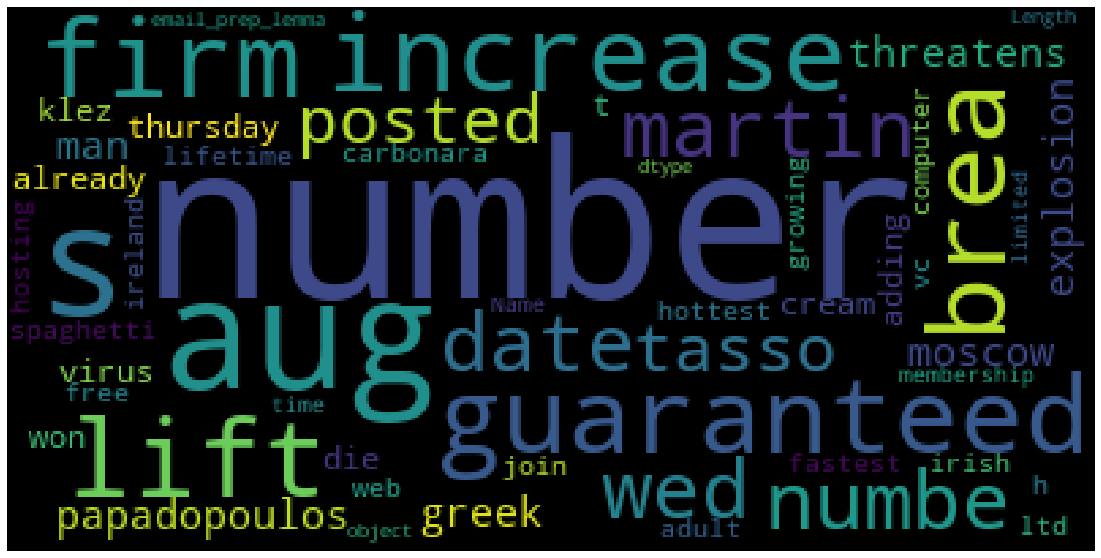

In [24]:
# semua email
word_cloud = WordCloud().generate(str(df_new['email_prep_lemma']))

plot_cloud(word_cloud)

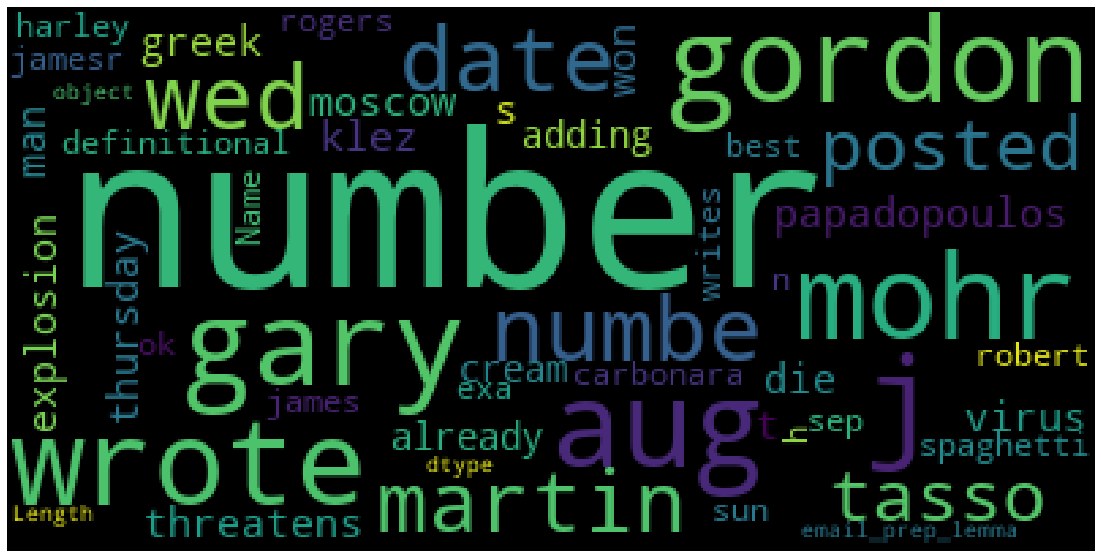

In [25]:
# email not-spam
word_cloud = WordCloud().generate(str(df_new[df_new['label']==0]['email_prep_lemma']))

plot_cloud(word_cloud)

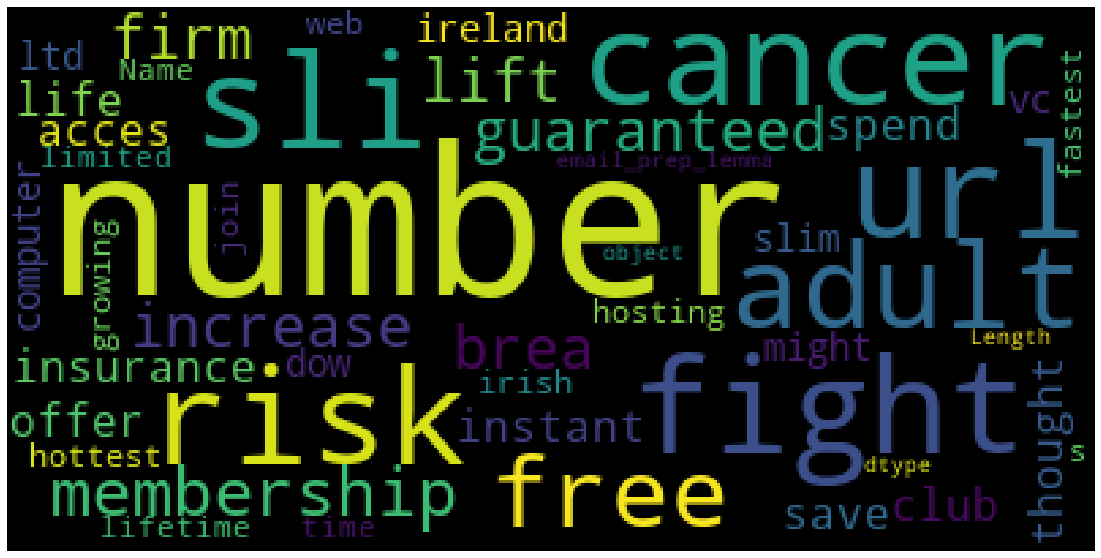

In [26]:
# email spam
word_cloud = WordCloud().generate(str(df_new[df_new['label']==1]['email_prep_lemma']))

plot_cloud(word_cloud)

### 3. Length of Sentence

In [27]:
# buat kolom baru
df_new['length'] = df_new['email'].apply(len)
df_new[['email','length']].head()

,email,length
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,1522
1,martin a posted tassos papadopoulos the greek ...,643
2,man threatens explosion in moscow thursday aug...,1509
3,klez the virus that won t die already the most...,1015
4,in adding cream to spaghetti carbonara which ...,771


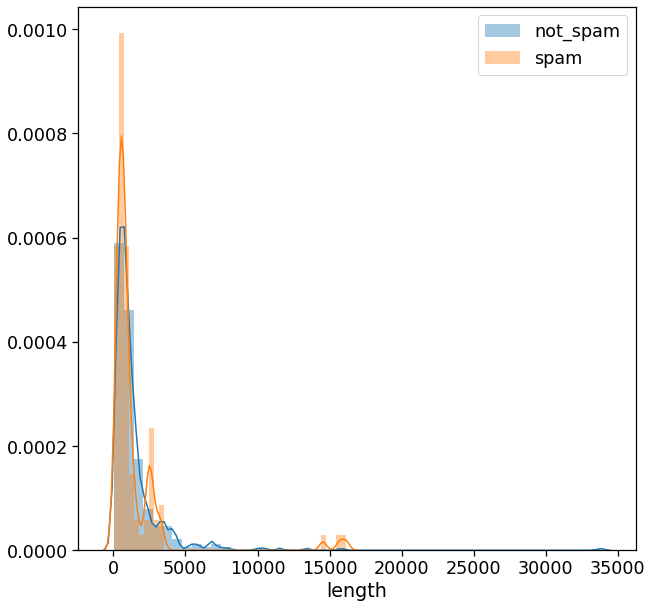

In [28]:
plt.figure(figsize = (10,10))

df_new_not = df_new[df_new['label'] == 0]
df_new_spam = df_new[df_new['label'] == 1]

sns.distplot(df_new_not['length'])
sns.distplot(df_new_spam['length'])

plt.legend(['not_spam','spam'])

plt.show()

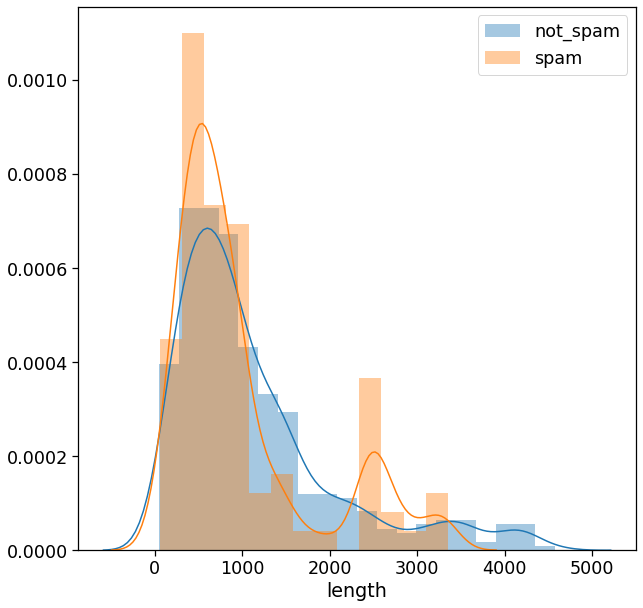

In [29]:
# untuk email yg panjangnya kurang dari 5000 char
plt.figure(figsize = (10,10))

df_new2 = df_new[df_new['length']<5000]
df_new_not = df_new2[df_new2['label'] == 0]
df_new_spam = df_new2[df_new2['label'] == 1]

sns.distplot(df_new_not['length'])
sns.distplot(df_new_spam['length'])

plt.legend(['not_spam','spam'])

plt.show()

# Document Term Matrix (DTM)

## Data split

In [30]:
# define text
text = df_new['email_prep_lemma']

# define y 
y = np.where(df_new['label']==1, 1, 0)

# split
text_train, text_test, y_train, y_test = train_test_split(text, y)

In [44]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
df_new['label'].dtype

dtype('O')

In [31]:
text_train

426    jim whitehead wrote great this is half of what...
563    market internet access no investment needed pr...
434    on wed number sep number gordon mohr wrote hmm...
293    url tuesday number october number number numbe...
519    number fight the risk of cancer url number sli...
                             ...                        
104    on sat oct number number at number number numb...
285    on tue number oct number number number number ...
376    use this address instead please prerogatively ...
72     me spam is the tool for dissident news since t...
372    once we thought of the internet a this thing w...
Name: email_prep_lemma, Length: 450, dtype: object

In [32]:
y_train 
# ternyata y_train harus array, ga boleh object

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## TF-IDF (N-grams)

In [33]:
# fit
vect = TfidfVectorizer()
vect.fit(text_train)

# Transform, lalu simpan text dengan nama X
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [34]:
X_train

<450x10266 sparse matrix of type '<class 'numpy.float64'>'
	with 56431 stored elements in Compressed Sparse Row format>

In [35]:
# DTM Atributes
print('X_train size:\n', repr(X_train))
print('X_test size:\n', repr(X_test))

X_train size:
 <450x10266 sparse matrix of type '<class 'numpy.float64'>'
	with 56431 stored elements in Compressed Sparse Row format>
X_test size:
 <150x10266 sparse matrix of type '<class 'numpy.float64'>'
	with 18184 stored elements in Compressed Sparse Row format>


In [36]:
feature_names = vect.get_feature_names()

print('number of features:', len(feature_names))
print('first 10 features:\n', feature_names[:10])
print('last 10 features:\n', feature_names[-10:])

number of features: 10266
first 10 features:
 ['aanumber', 'aaxine', 'abandoned', 'abdominal', 'abducted', 'abduction', 'aberdeenshire', 'aberration', 'abidjan', 'ability']
last 10 features:
 ['zone', 'zonefile', 'zoo', 'zoomable', 'zsh', 'zyxel', 'zzzz', 'zzzzteana', 'écrite', 'était']


# Text Classification
Logistic Regression

In [37]:
# model yg digunakan
model = LogisticRegression()

# fit model
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# predict
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       126
           1       1.00      0.42      0.59        24

    accuracy                           0.91       150
   macro avg       0.95      0.71      0.77       150
weighted avg       0.92      0.91      0.89       150



## Hyperparameter Tuning

In [39]:
# define vectorizer dan model
vect = TfidfVectorizer()
model = LogisticRegression()

# pipeline
pipe = Pipeline([
    ('preprocessing', vect),
    ('model', model)
])

# param_grid
param_grid = {
    'model__C':[0.001,0.01,0.1,1,10]
}

# hyperparameter tuning dgn cross val splits 5
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5
)

In [40]:
# fit grid
grid.fit(text_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [41]:
print('best_score_ ', grid.best_score_)
print('best_params_ ', grid.best_params_)

best_score_  0.9844444444444445
best_params_  {'model__C': 10}


In [42]:
# fit grid dengan parameter terpilih, dengan text dan y train
grid.best_estimator_.fit(text_train, y_train)

# predict
y_pred_tfidf = grid.best_estimator_.predict(text_test)

print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       126
           1       1.00      0.75      0.86        24

    accuracy                           0.96       150
   macro avg       0.98      0.88      0.92       150
weighted avg       0.96      0.96      0.96       150



# Result

In [43]:
print('Before Tuning \n')
print(classification_report(y_test, y_pred))
print()

print('After Tuning \n')
print(classification_report(y_test, y_pred_tfidf))
print()

Before Tuning 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       126
           1       1.00      0.42      0.59        24

    accuracy                           0.91       150
   macro avg       0.95      0.71      0.77       150
weighted avg       0.92      0.91      0.89       150


After Tuning 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       126
           1       1.00      0.75      0.86        24

    accuracy                           0.96       150
   macro avg       0.98      0.88      0.92       150
weighted avg       0.96      0.96      0.96       150




# Kesimpulan

Machine learning dengan data spam_or_not_spam.csv ini menggunakan TF-IDF vestorizer dalam document term matrixnya, dan menggunakan Logistic Regression untuk model klasifikasinya.

- Model mengalami peningkatan performa f1 score setelah dilakukan hyperparameter tuning

- Vectorizer tanpa n-gram lebih baik performanya dari pada menggunakan n-gram(2)